# 多元线性回归/对数线性回归（二选一）

## 一、多元线性回归
这部分的内容是要求大家完成多元线性回归，我们会先带着大家使用sklearn做一元线性回归的十折交叉验证，多元线性回归大家可以仿照着完成

### 1. 读取数据

In [2]:
import numpy as np

In [3]:
import pandas as pd

# 读取数据
data = pd.read_csv('data/kaggle_house_price_prediction/kaggle_hourse_price_train.csv')

# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)

# 只保留整数的特征
data = data[[col for col in data.dtypes.index if data.dtypes[col] == 'int64']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

### 2. 引入模型

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

### 3. 使用sklearn完成一元线性回归的十折交叉验证验证

#### 创建模型

In [6]:
model = LinearRegression()

#### 选取数据

In [7]:
features = ['LotArea']
x = data[features]
y = data['SalePrice']

#### 做十折交叉验证的预测

In [8]:
prediction = cross_val_predict(model, x, y, cv = 10)

这十折交叉验证是按顺序做的，会先将前10%的数据作为测试集，然后会往后顺延到10%到20%，最后将这十份的预测值按顺序拼接后返回

In [9]:
prediction.shape

(1460,)

### 4. 计算评价指标

#### MAE

In [10]:
mean_absolute_error(prediction, data['SalePrice'])

55394.44195244894

#### RMSE

In [11]:
mean_squared_error(prediction, data['SalePrice']) ** 0.5

77868.51337752414

### 5. 请你选择多种特征进行组合，完成多元线性回归，并对比不同的特征组合，它们训练出的模型在十折交叉验证上MAE与RMSE的差别，至少完成3组

###### 扩展：多项式回归（一元线性回归的扩展），尝试对部分特征进行变换，如将其二次幂，三次幂作为特征输入模型，观察模型在预测能力上的变化
###### 提示：多元线性回归，只要在上方的features这个list中，加入其他特征的名字就可以

In [64]:
# YOUR CODE HERE

features = [['YearBuilt', 'GrLivArea'], ['YearBuilt', 'GrLivArea', 'TotalBsmtSF'],
            ['YearBuilt', 'GrLivArea', 'TotalBsmtSF', 'GarageArea'], ['YearBuilt', 'OverallQual'],
            ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']]

mae = []
rmse = []

x = []
for i in range(len(features)):
    x.append(data[features[i]])
y = data['SalePrice']


def addResult(x1, y1):
    model1 = LinearRegression()
    prediction1 = cross_val_predict(model1, x1, y1, cv=10)
    mae.append(mean_absolute_error(prediction1, data['SalePrice']))
    rmse.append(mean_squared_error(prediction1, data['SalePrice']) ** 0.5)


for i in range(len(features)):
    addResult(x[i], y)

result = pd.DataFrame({'MAE': mae, 'RMSE': rmse, 'Features': features})
l = []
for i in range(result.shape[0]):
    l.append("模型" + str(i + 1))
result.index = l
result.head(result.shape[0])

,MAE,RMSE,Features
模型1,30941.623384,46955.056201,"[YearBuilt, GrLivArea]"
模型2,27453.533717,44563.833175,"[YearBuilt, GrLivArea, TotalBsmtSF]"
模型3,26514.029706,43336.047019,"[YearBuilt, GrLivArea, TotalBsmtSF, GarageArea]"
模型4,33347.472376,48276.906734,"[YearBuilt, OverallQual]"
模型5,25152.999866,39870.117063,"[OverallQual, GrLivArea, TotalBsmtSF, GarageArea]"


In [65]:
tmp = x[4].copy()

In [66]:
x = []
mae = []
rmse = []
features = []


xx = tmp.copy()
xx['OverallQual'] = np.power(xx['OverallQual'], 2)
x.append(xx)
features.append(['OverallQual ** 2', 'GrLivArea', 'TotalBsmtSF', 'GarageArea'])

xx = tmp.copy()
xx['OverallQual'] = np.power(xx['OverallQual'], 3)
x.append(xx)
features.append(['OverallQual ** 3', 'GrLivArea', 'TotalBsmtSF', 'GarageArea'])

xx = tmp.copy()
xx['OverallQual'] = np.power(xx['OverallQual'], 4)
x.append(xx)
features.append(['OverallQual ** 3', 'GrLivArea', 'TotalBsmtSF', 'GarageArea'])


In [156]:
for i in range(len(features)):
    addResult(x[i], y)

result = pd.DataFrame({'MAE': mae, 'RMSE': rmse, 'Features': features})
l = []
for i in range(result.shape[0]):
    l.append("模型" + str(i + 1))
result.index = l
result.head(result.shape[0])

,MAE,RMSE,Features
模型1,49815.379637,74477.031546,"[OverallQual ** 2, GrLivArea, TotalBsmtSF, Gar..."
模型2,49815.379637,74477.031546,"[OverallQual ** 3, GrLivArea, TotalBsmtSF, Gar..."
模型3,49815.379637,74477.031546,"[OverallQual ** 3, GrLivArea, TotalBsmtSF, Gar..."


###### 双击此处填写
1. 模型1使用的特征：建成年份(YearBuilt), 地面以上居住面积(GrLivArea)
2. 模型2使用的特征：建成年份(YearBuilt), 地面以上居住面积(GrLivArea), 地下室面积(TotalBsmtSF)
3. 模型3使用的特征：建成年份(YearBuilt), 地面以上居住面积(GrLivArea), 地下室面积(TotalBsmtSF), 车库面积(GarageArea)
4. 模型3使用的特征：建成年份(YearBuilt), 总体质量(OverallQual)
5. 模型3使用的特征：总体质量(OverallQual), 地面以上居住面积(GrLivArea), 地下室面积(TotalBsmtSF), 车库面积(GarageArea)

模型|MAE|RMSE
-|-|-
模型1 | 30941.623384 | 46955.056201	
模型2 | 27453.533717 | 44563.833175	
模型3 | 26514.029706 | 43336.047019
模型4 | 33347.472376 | 48276.906734	
模型5 | 25152.999866 | 39870.117063

<AxesSubplot:>

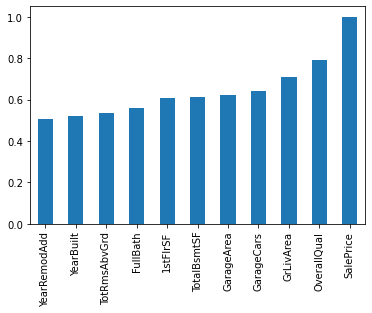

In [14]:
# 相关系数大于0.5的特征
corr = data.corr()
corr = corr['SalePrice']
corr[abs(corr) > 0.5].sort_values().plot.bar()

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

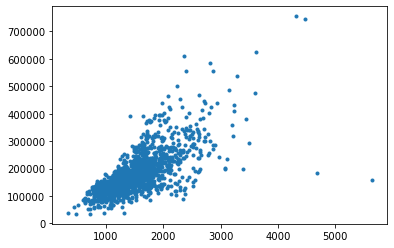

In [16]:
# GrLivArea, SalePrice

plt.plot(data['GrLivArea'].values, data['SalePrice'], '.')

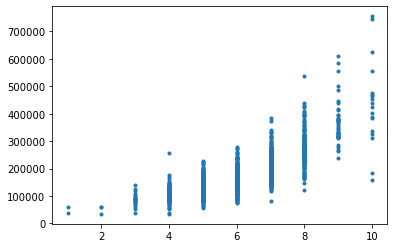

In [17]:
# GrLivArea, SalePrice

plt.plot(data['OverallQual'].values, data['SalePrice'], '.')